# 📓  01_eda_fraud_data.ipynb (E-commerce Exploration)

In [1]:
# %% [markdown]
# # E-commerce Fraud Data EDA
# Exploratory Data Analysis for Fraud_Data.csv

# %% [markdown]
# ## 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# ## 2. Load Data
fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
print(f"📊 Dataset shape: {fraud_data.shape}")
print(f"📋 Columns: {fraud_data.columns.tolist()}")
fraud_data.head()

📊 Dataset shape: (151112, 11)
📋 Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
# ## 3. Data Cleaning
print("🔍 Checking data quality...")

# Check data types
print("\n📋 Data Types:")
print(fraud_data.dtypes)

# Check missing values
print("\n❓ Missing Values:")
print(fraud_data.isnull().sum())

# Check duplicates
print(f"\n🔍 Duplicate rows: {fraud_data.duplicated().sum()}")

# Fix datetime columns
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

print("\n✅ Data cleaning completed!")

🔍 Checking data quality...

📋 Data Types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

❓ Missing Values:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

🔍 Duplicate rows: 0

✅ Data cleaning completed!


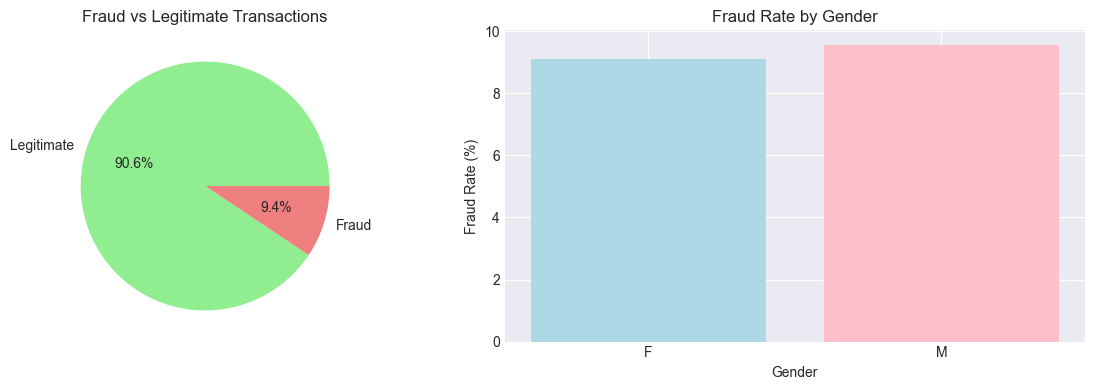

📈 Overall fraud rate: 9.3646%
👨 Fraud rate for males: 9.5523%
👩 Fraud rate for females: 9.1007%


In [4]:
# ## 4. Target Variable Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Class distribution
class_counts = fraud_data['class'].value_counts()
axes[0].pie(class_counts, labels=['Legitimate', 'Fraud'], 
           autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[0].set_title('Fraud vs Legitimate Transactions')

# Fraud rate by gender
gender_fraud = fraud_data.groupby('sex')['class'].mean()
axes[1].bar(gender_fraud.index, gender_fraud.values * 100, 
           color=['lightblue', 'pink'])
axes[1].set_title('Fraud Rate by Gender')
axes[1].set_ylabel('Fraud Rate (%)')
axes[1].set_xlabel('Gender')

plt.tight_layout()
plt.show()

print(f"📈 Overall fraud rate: {fraud_data['class'].mean():.4%}")
print(f"👨 Fraud rate for males: {fraud_data[fraud_data['sex'] == 'M']['class'].mean():.4%}")
print(f"👩 Fraud rate for females: {fraud_data[fraud_data['sex'] == 'F']['class'].mean():.4%}")


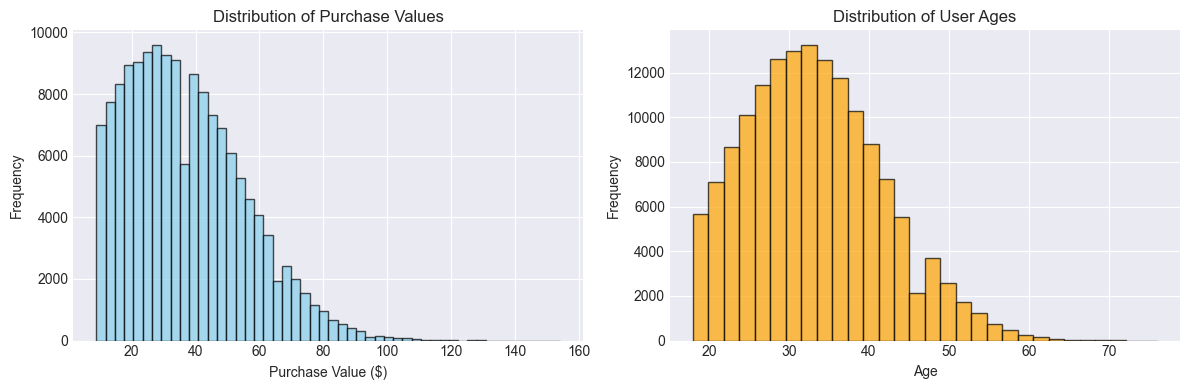

In [5]:
# ## 5. Numerical Features Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Purchase value distribution
axes[0].hist(fraud_data['purchase_value'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Purchase Values')
axes[0].set_xlabel('Purchase Value ($)')
axes[0].set_ylabel('Frequency')

# Age distribution
axes[1].hist(fraud_data['age'], bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1].set_title('Distribution of User Ages')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


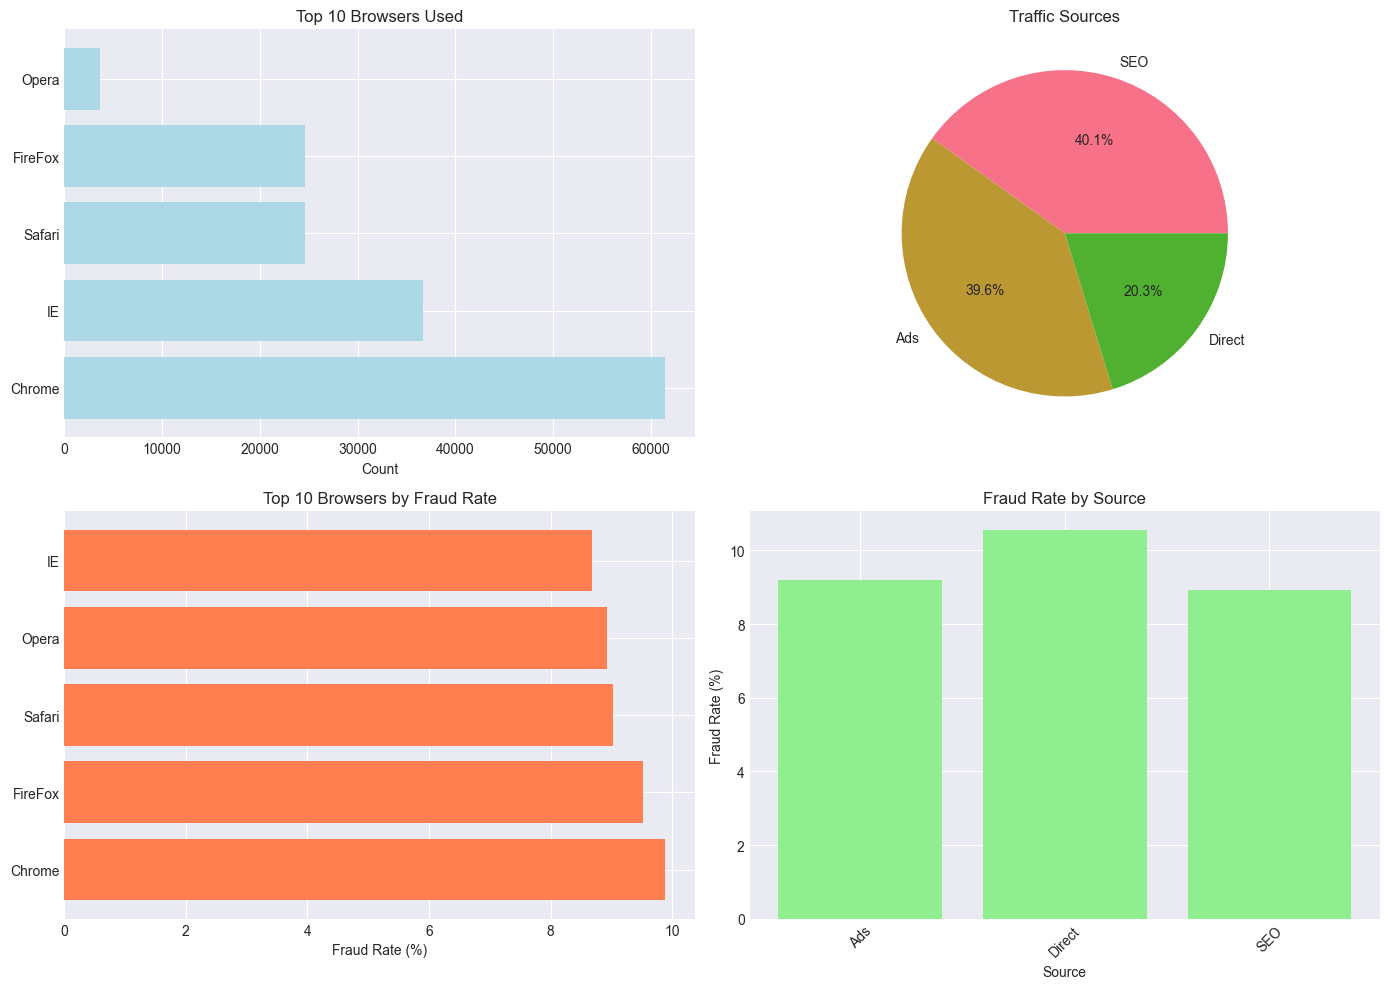

In [6]:
# ## 6. Categorical Features Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Browser usage
browser_counts = fraud_data['browser'].value_counts().head(10)
axes[0,0].barh(browser_counts.index, browser_counts.values, color='lightblue')
axes[0,0].set_title('Top 10 Browsers Used')
axes[0,0].set_xlabel('Count')

# Source analysis
source_counts = fraud_data['source'].value_counts()
axes[0,1].pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Traffic Sources')

# Browser fraud rate
browser_fraud = fraud_data.groupby('browser')['class'].mean().sort_values(ascending=False).head(10)
axes[1,0].barh(browser_fraud.index, browser_fraud.values * 100, color='coral')
axes[1,0].set_title('Top 10 Browsers by Fraud Rate')
axes[1,0].set_xlabel('Fraud Rate (%)')

# Source fraud rate
source_fraud = fraud_data.groupby('source')['class'].mean()
axes[1,1].bar(source_fraud.index, source_fraud.values * 100, color='lightgreen')
axes[1,1].set_title('Fraud Rate by Source')
axes[1,1].set_xlabel('Source')
axes[1,1].set_ylabel('Fraud Rate (%)')
plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()


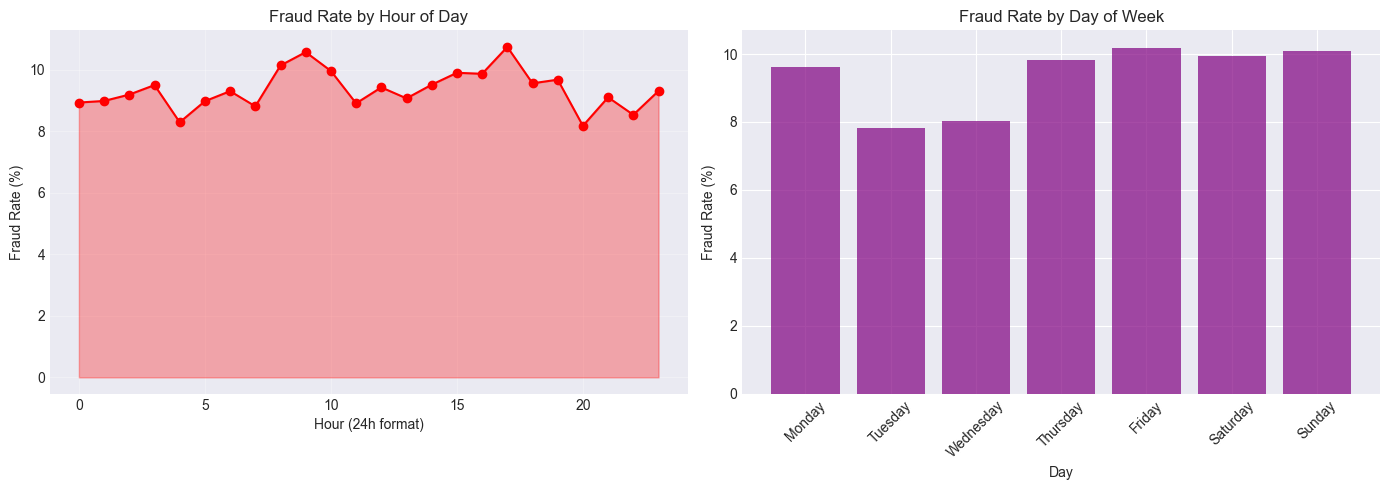

In [7]:
# ## 7. Time Analysis
# Create time features
fraud_data['purchase_hour'] = fraud_data['purchase_time'].dt.hour
fraud_data['purchase_day'] = fraud_data['purchase_time'].dt.day_name()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fraud by hour
hour_fraud = fraud_data.groupby('purchase_hour')['class'].mean()
axes[0].plot(hour_fraud.index, hour_fraud.values * 100, marker='o', color='red')
axes[0].fill_between(hour_fraud.index, 0, hour_fraud.values * 100, alpha=0.3, color='red')
axes[0].set_title('Fraud Rate by Hour of Day')
axes[0].set_xlabel('Hour (24h format)')
axes[0].set_ylabel('Fraud Rate (%)')
axes[0].grid(True, alpha=0.3)

# Fraud by day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_fraud = fraud_data.groupby('purchase_day')['class'].mean().reindex(day_order)
axes[1].bar(day_fraud.index, day_fraud.values * 100, color='purple', alpha=0.7)
axes[1].set_title('Fraud Rate by Day of Week')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Fraud Rate (%)')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# ## 8. Save Insights
print("💾 Saving cleaned data and insights...")

# Save cleaned data
fraud_data.to_csv('../data/processed/fraud_data_cleaned.csv', index=False)

# Save key insights
insights = {
    'fraud_rate': float(fraud_data['class'].mean()),
    'total_transactions': len(fraud_data),
    'fraud_count': int(fraud_data['class'].sum()),
    'avg_purchase_value': float(fraud_data['purchase_value'].mean()),
    'avg_age': float(fraud_data['age'].mean()),
    'high_fraud_browser': browser_fraud.index[0],
    'high_fraud_hour': int(hour_fraud.idxmax())
}

import json
with open('../data/processed/fraud_eda_insights.json', 'w') as f:
    json.dump(insights, f, indent=4)

print("✅ EDA completed! Data saved to '../data/processed/'")
print("\n📊 Key Insights:")
for key, value in insights.items():
    print(f"   {key}: {value}")

💾 Saving cleaned data and insights...
✅ EDA completed! Data saved to '../data/processed/'

📊 Key Insights:
   fraud_rate: 0.09364577267192546
   total_transactions: 151112
   fraud_count: 14151
   avg_purchase_value: 36.93537243898565
   avg_age: 33.14070358409656
   high_fraud_browser: Chrome
   high_fraud_hour: 17
